In [100]:
from pandas import DataFrame, read_csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import folium as fl
import wordcloud as wc
from wordcloud import STOPWORDS,WordCloud
import collections
import seaborn as sbn
import nltk
from nltk import word_tokenize
nltk.download('punkt')
# nltk.download(u'stopwords')
# from nltk.corpus import stopwords
# import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer,PorterStemmer
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\myrto\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\myrto\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [101]:
months = ['\\april','\\febrouary','\march']
months2 = ['febrouary','march','april']
files = ['\listings.csv','\listings0.csv']
inputPath= r"C:\Users\myrto\Desktop\data"
#inputPath= r"C:\Users\nikol\Desktop\dataMining_p1\data\data"
columnlist = ['id','zipcode','transit','bedrooms','beds','review_scores_rating','number_of_reviews','neighbourhood','name','latitude','longitude','last_review','instant_bookable','host_since','host_response_rate','host_identity_verified','host_has_profile_pic','first_review','description','city','cancellation_policy','bed_type','bathrooms','accommodates','amenities','room_type','property_type','price','availability_365','minimum_nights','host_id']

framelist = []
monthlist = []
i=0
for month in months:
    for file in files:
        tempfile = pd.read_csv(inputPath+month+file,index_col=False)
        tempframe = pd.DataFrame(data=tempfile)
        framelist.append(tempframe)
    for l in range(0,len(framelist)-1):
        train = framelist[0].combine_first(framelist[l+1])
    df = pd.DataFrame(data = train, columns=columnlist)
    df.drop_duplicates(subset='id',ignore_index=True,inplace=True)
    df.insert(loc=len(df.columns),column='month_id',value=months2[i])
    monthlist.append(df)
    i=i+1

df = pd.concat(monthlist)
df['price'] = df['price'].apply(lambda x: x.translate(str.maketrans({',':'','$':''})))
df['price'] = pd.to_numeric(df['price'])

for x in df.select_dtypes('number').columns:
    df[x].fillna(df[x].mean(),inplace=True)
df.fillna(method='backfill',inplace=True)
df.dropna(inplace=True)
df.to_csv("train.csv")

# df.isna().sum()

In [40]:
temp = df[['id','neighbourhood']]
reviews = r'C:\Users\myrto\Desktop\data\april\reviews.csv'
reviews0 = r'C:\Users\myrto\Desktop\data\april\reviews0.csv'
# reviews = r'C:\Users\nikol\Desktop\dataMining_p1\data\data\april\reviews.csv'
# reviews0 = r'C:\Users\nikol\Desktop\dataMining_p1\data\data\april\reviews0.csv'
reviews = pd.read_csv(reviews,usecols=['id','comments'])
reviews0 = pd.read_csv(reviews0)
reviews = pd.DataFrame(data=reviews)
reviews0 = pd.DataFrame(data=reviews0)
reviews = reviews.combine_first(reviews0)
reviews.dropna(inplace=True)

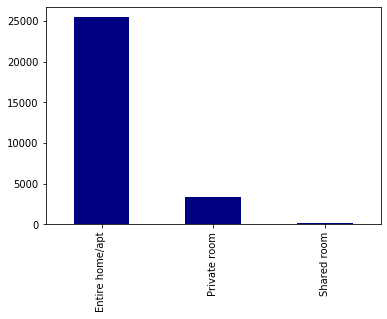

In [73]:
# 1
dt = df['room_type'].value_counts()
dt.plot.bar(color='navy')

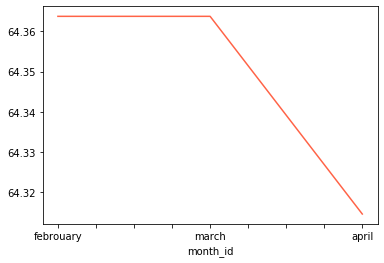

In [75]:
# 2
groupbymonth = df.groupby(by='month_id',sort=False)['price'].mean().plot(x='per_month',y='price',color='tomato')

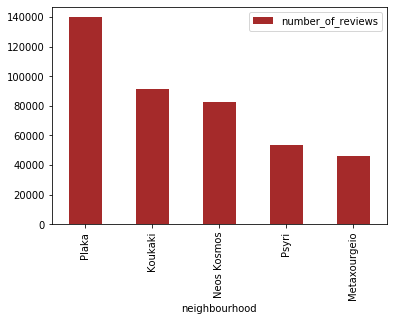

In [72]:
# 3
temp = df[['neighbourhood','number_of_reviews']].groupby('neighbourhood',as_index=False).sum()
temp = temp.sort_values(['number_of_reviews'],ascending=False)
temp.head(5).plot.bar(x='neighbourhood',color='brown')


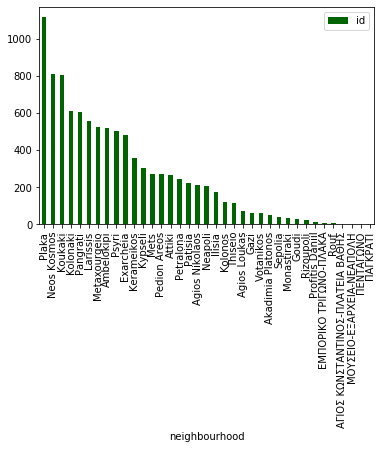

In [74]:
#4
df.groupby(by='neighbourhood',as_index=False).agg({'id':'nunique'}).sort_values(['id'],ascending=False,ignore_index=True).plot.bar(x='neighbourhood',color='darkgreen')

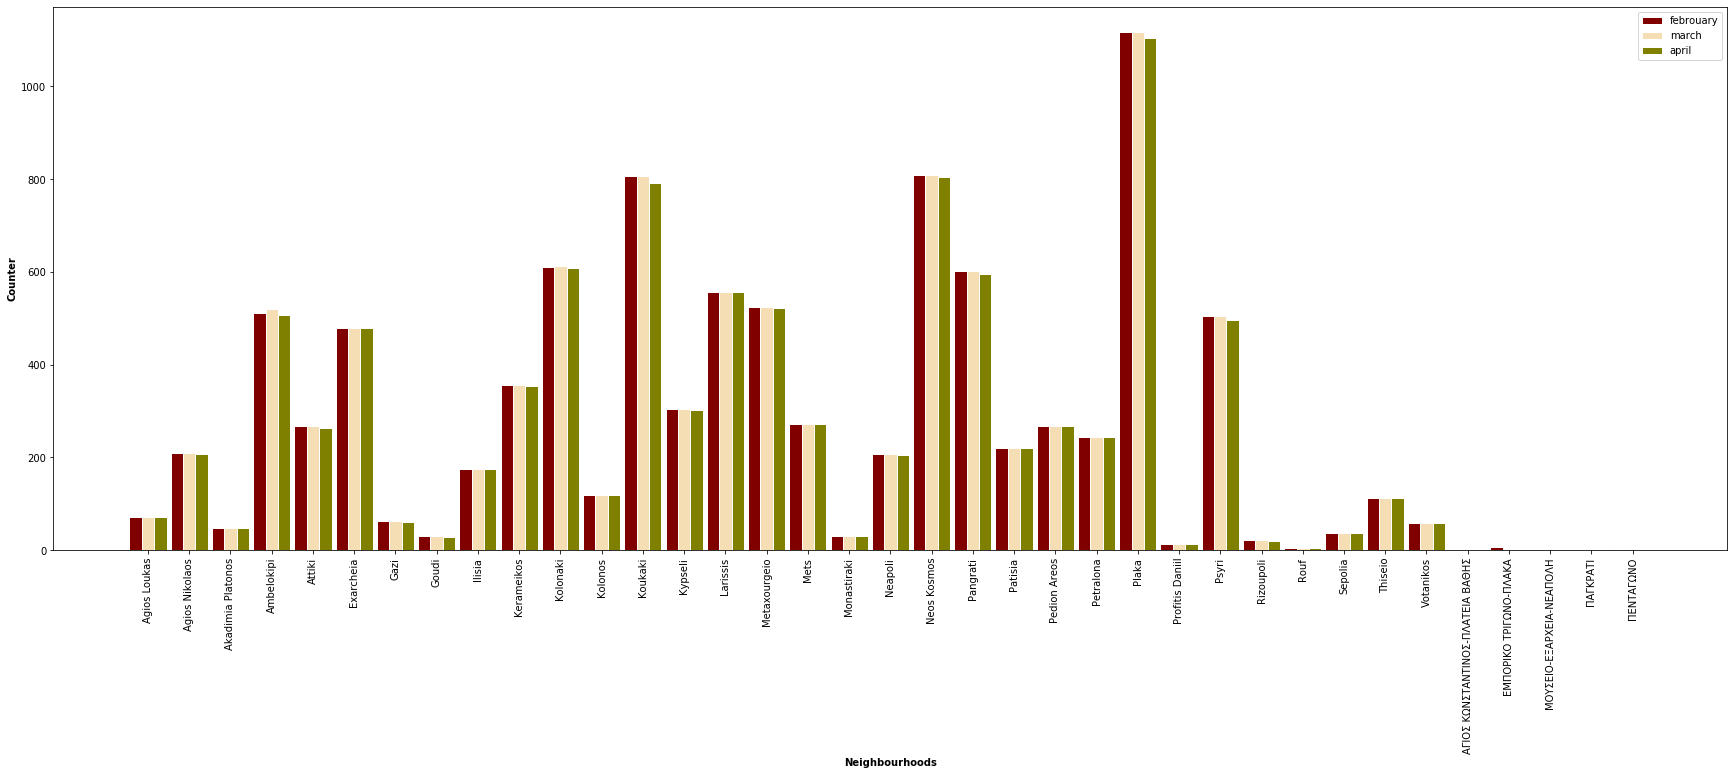

In [104]:
#5
d = {}
templist = []
aprilList = []
marchList = []
febrouaryList = []
groupbyMonth = df
groupbyMonth = groupbyMonth.groupby(['neighbourhood','month_id']).agg({'id':'count'}).reset_index()
groupbyMonth = groupbyMonth.rename(columns = {'id':'Count'})
groupbyMonth.apply(lambda row : templist.append(tuple([row['neighbourhood'],row['month_id'],row['Count']])),axis=1)

for neighbourhood,month,count in templist:
    d[neighbourhood] = {'april':0,'march':0,'febrouary':0}

for neighbourhood,month,count in list:
    d[neighbourhood][month] = count

neighbourhoodList = [x for x in d.keys()]
for x in neighbourhoodList:
    aprilList.append(d[x]['april'])
    marchList.append(d[x]['march'])
    febrouaryList.append(d[x]['febrouary'])

barWidth = 0.3
plt.figure(figsize=(30,10))
# Set position of bar on X axis
r1 = np.arange(len(neighbourhoodList))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, febrouaryList, color='maroon', width=barWidth, edgecolor='white', label='febrouary')
plt.bar(r2, marchList, color='wheat', width=barWidth, edgecolor='white', label='march')
plt.bar(r3, aprilList, color='olive', width=barWidth, edgecolor='white', label='april')
 
# Add xticks on the middle of the group bars
plt.xlabel('Neighbourhoods', fontweight='bold')
plt.ylabel('Counter', fontweight='bold')
plt.xticks([r + 0.3 for r in range(len(neighbourhoodList))], neighbourhoodList,rotation='vertical')
 
# Create legend & Show graphic
plt.legend()
plt.show()

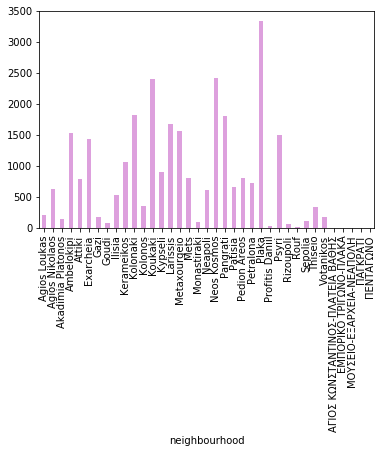

In [76]:
#6
graph = df.groupby(by='neighbourhood').size()
graph.plot.bar(y='Count',x='Neighbourhoods',color='plum')

In [8]:
#7
temp = df[['room_type','neighbourhood','host_id']]
temp.dropna(inplace=True)
temp.drop_duplicates(subset='host_id',inplace=True)
temp = temp.groupby(['neighbourhood','room_type']).size().sort_values(ascending=False)
temp


neighbourhood    room_type      
Plaka            Entire home/apt    285
Koukaki          Entire home/apt    283
Neos Kosmos      Entire home/apt    249
Kolonaki         Entire home/apt    198
Ambelokipi       Entire home/apt    187
                                   ... 
Profitis Daniil  Shared room          1
Kolonos          Shared room          1
Patisia          Private room         1
Monastiraki      Private room         1
ΠΕΝΤΑΓΩΝΟ        Entire home/apt      1
Length: 63, dtype: int64

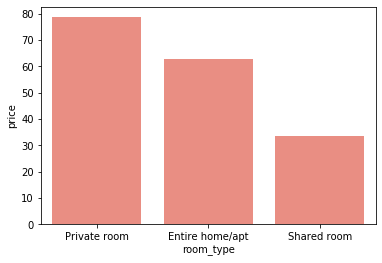

In [55]:
# 8
tempdf = df[['room_type','id','price']]
tempdf.drop_duplicates(subset='id',inplace=True)
temp = tempdf.groupby(by=['room_type'],as_index=False).agg({'price':'mean'}).sort_values(['price'],ascending=False,ignore_index=True)
sbn.barplot(x='room_type',y='price', data=temp, color="salmon")


In [21]:
# 9
latitude = []
longitude = []
tempdf = df[['latitude','longitude','host_id','price','bed_type','room_type']]
tempdf.drop_duplicates(subset='host_id',inplace=True)
latitude = tempdf['latitude'].tolist()
longitude = tempdf['longitude'].tolist()
price = tempdf['price'].tolist()
btype = tempdf['bed_type'].tolist()
rtype = tempdf['room_type'].tolist()

tooltip = 'Click me!'

m = fl.Map(location=[latitude[0],longitude[0]], zoom_start=12,tiles='Stamen Terrain')

for i, j in zip(range(1,100),range(1,100)):
    fl.Marker(location=[latitude[i], longitude[j]], icon=fl.Icon(color='red', icon='info-sign'),tooltip=tooltip,popup=('$'+str(price[i])+'\n'+str(rtype[i])+'\n'+str(btype[i]))).add_to(m)
m



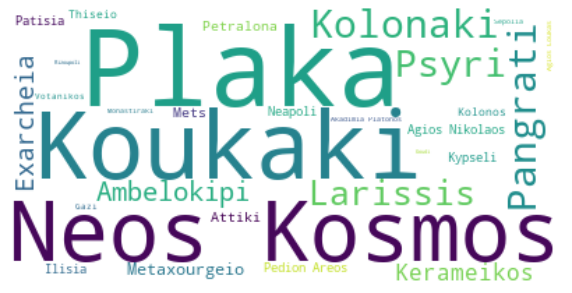

In [14]:
# 10 - neighbourhood

text = df['neighbourhood']
text = text.tolist()
tuples = collections.Counter(text)

words = WordCloud(background_color='white').generate_from_frequencies(frequencies=dict(tuples))

plt.figure(figsize=(10,10))
plt.imshow(words,interpolation='bilinear')
plt.axis("off")
plt.show()



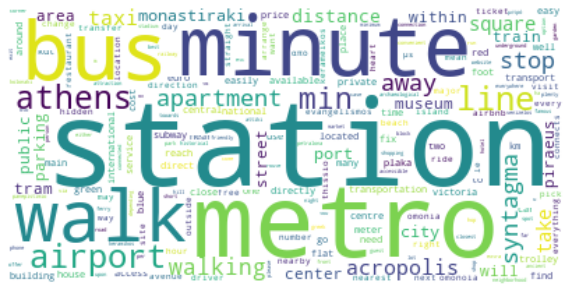

In [23]:
# 10 - transit

stopwords = set(STOPWORDS)
textWords = []
for x in df['transit']:
    for y in word_tokenize(x) :
        y = y.lower()
        y = WordNetLemmatizer().lemmatize(y)
        if (y not in stopwords) and y.isalpha():
            textWords.append(y)
            
counter = collections.Counter(textWords)
words = WordCloud(background_color='white',stopwords=stopwords).generate_from_frequencies(frequencies=dict(counter))

plt.figure(figsize=(10,10))
plt.imshow(words,interpolation='bilinear')
plt.axis("off")
plt.show()


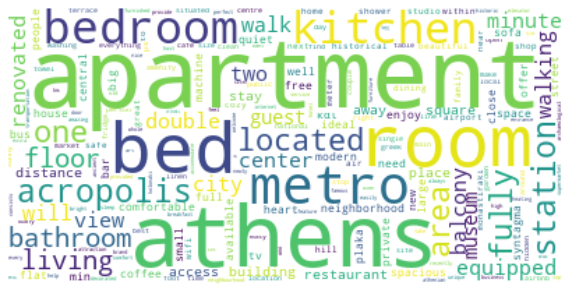

In [16]:
# 10 - description

stopwords = set(STOPWORDS)
textWords = []
for x in df['description']:
    for y in word_tokenize(x) :
        y = y.lower()
        if (y not in stopwords) and (y not in stopwords) and y.isalpha():
            y = WordNetLemmatizer().lemmatize(y)
            textWords.append(y)
            
counter = collections.Counter(textWords)
words = WordCloud(background_color='white',stopwords=stopwords).generate_from_frequencies(frequencies=dict(counter))

plt.figure(figsize=(10,10))
plt.imshow(words,interpolation='bilinear')
plt.axis("off")
plt.show()


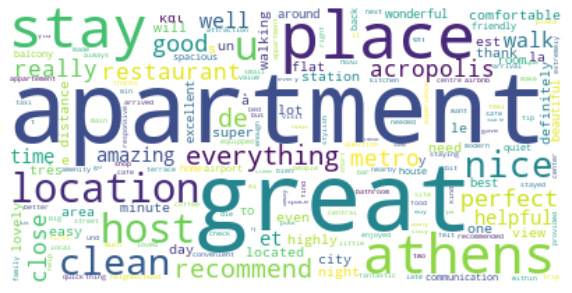

In [41]:
# 10 - last_review

temp = df['last_review']
dates = temp.tolist()
temp = df['id']
ids = temp.tolist()

rev = DataFrame(data=reviews[['date','comments','listing_id']])
temp  = rev.loc[(rev['date'].isin(dates)) & (rev['listing_id'].isin(ids))]

stopwords = set(STOPWORDS)
textWords = []
for x in temp['comments']:
    for y in word_tokenize(x) :
        y = y.lower()
        if (y not in stopwords) and y.isalpha():
            y = WordNetLemmatizer().lemmatize(y)
            textWords.append(y)
            
counter = collections.Counter(textWords)
words = WordCloud(background_color='white',stopwords=stopwords).generate_from_frequencies(frequencies=dict(counter))

plt.figure(figsize=(10,10))
plt.imshow(words,interpolation='bilinear')
plt.axis("off")
plt.show()


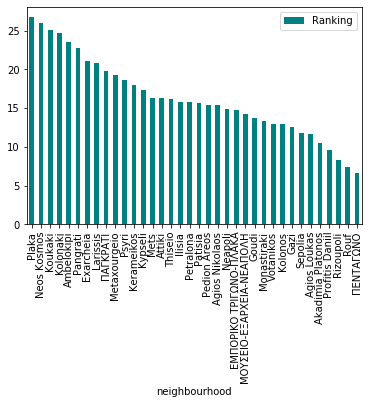

In [109]:
# 12-a
def findRating(a,b,c):
    return (0.2*a+0.5*b+0.3*c)/10
tempdf = df.drop_duplicates('host_id')
neighbourhoodsCost = tempdf.groupby('neighbourhood').agg({'price':'mean','availability_365':'mean','host_id':'count'}).reset_index()
neighbourhoodsCost = neighbourhoodsCost.rename(columns = {'price':'Average price','availability_365':'Average availability','host_id':'#hotels'})
neighbourhoodsCost['Ranking'] = neighbourhoodsCost.apply(lambda row : findRating(row['Average price'],row['Average availability'],row['#hotels']),axis=1)
temp = neighbourhoodsCost.sort_values('Ranking',ascending=False,ignore_index=True)
temp.plot.bar(x= 'neighbourhood', y = 'Ranking',color='teal')
# sbn.barplot(x= 'neighbourhood', y = 'Ranking', data = temp)

In [88]:
# 12-b

neighbourhoodsCost = df.groupby('neighbourhood').agg({'review_scores_rating':'mean','id':'count'}).sort_values('review_scores_rating',ascending=False)
neighbourhoodsCost
# neighbourhoodsCost['Ranking'] = neighbourhoodsCost.apply(lambda row : findRating(row['Average price'],row['Average availability'],row['#hotels']),axis=1)


,review_scores_rating,id
neighbourhood,,
ΠΕΝΤΑΓΩΝΟ,97.718337,2
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,97.718337,2
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,97.718337,2
Sepolia,97.305396,110
Kolonos,96.733587,357
Gazi,96.635263,185
Akadimia Platonos,96.394683,141
Thiseio,96.306221,336
Koukaki,96.141739,2404
